In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from sklearn import datasets

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]

# Pandas

"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." ~ https://pandas.pydata.org

**Data structures:**
* Series: a pandas Series is a one dimensional data structure that can store values and for every value it holds a unique index.
* DataFrame: a pandas DataFrame is a two dimensional data structure. It can be seen as a table with rows and columns. The columns have names and the rows have indexes.

## The Boston Housing Dataset
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston suburbs.

## Load data

You can load datasets in the `.csv` file too, for instance `df = pd.read_csv('data.csv', delimiter=',')`. See [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more.

In [3]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data, columns=map(str.lower, boston_data.feature_names))
df['medv'] = pd.Series(boston_data.target)

## Selecting data

In [4]:
# Prints whole data frame.
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Variables description:**
```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [5]:
# Prints first 10 rows.
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# Prints last 10 rows.
df.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
# Samples 10 rows
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8.0,307.0,17.4,390.07,4.73,31.5
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
44,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3.0,233.0,17.9,389.39,9.55,21.2
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22,21.4
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,403.0,14.7,292.29,14.43,17.4


In [8]:
# Selects medv column.
# NOTE: It returns data copied into Series!
# TODO: Check it!
df['medv'] # or df.medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
# Selects tax and medv columns.
# NOTE: It returns data copied into DataFrame + order matters!
df[['tax', 'medv']]

,tax,medv
0,296.0,24.0
1,242.0,21.6
2,242.0,34.7
3,222.0,33.4
4,222.0,36.2
...,...,...
501,273.0,22.4
502,273.0,20.6
503,273.0,23.9
504,273.0,22.0


In [10]:
# Slices (selects) ROWS between 3 and 7 by INDEX column.
df.loc[3:7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


In [11]:
# Slices (selects) rows between 3 and 7 by POSITION.
# NOTE: It's almost the same (higher bound is exclusive) as by index,
#       because our index happens to be numerical from 0 to 505.
df.iloc[3:7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [12]:
# Slices rows between 3 and 7 (by their index column) and selects columns tax and medv (by their name).
df.loc[3:7, ['tax', 'medv']]

,tax,medv
3,222.0,33.4
4,222.0,36.2
5,222.0,28.7
6,311.0,22.9
7,311.0,27.1


In [13]:
# Slices rows between 3 and 7 (by their position) and selects columns tax and medv (by their position).
df.iloc[3:7, [9, 13]]

,tax,medv
3,222.0,33.4
4,222.0,36.2
5,222.0,28.7
6,311.0,22.9


In [14]:
# Slices rows and columns by their index/name.
df.loc[3:7, 'tax':'medv']

,tax,ptratio,b,lstat,medv
3,222.0,18.7,394.63,2.94,33.4
4,222.0,18.7,396.90,5.33,36.2
5,222.0,18.7,394.12,5.21,28.7
6,311.0,15.2,395.60,12.43,22.9
7,311.0,15.2,396.90,19.15,27.1


In [15]:
# Slices rows and columns by their positions.
# NOTE: Higher bound is exclusive in this case!
df.iloc[3:7, 9:13]

,tax,ptratio,b,lstat
3,222.0,18.7,394.63,2.94
4,222.0,18.7,396.90,5.33
5,222.0,18.7,394.12,5.21
6,311.0,15.2,395.60,12.43


In [16]:
# Selects rows conditionally.
# TODO: Select ALL columns.
cond = df.age > 80
cond.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
Name: age, dtype: bool

In [17]:
df.loc[cond, 'medv']

7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
       ... 
491    13.6
492    20.1
503    23.9
504    22.0
505    11.9
Name: medv, Length: 240, dtype: float64

In [18]:
# Stacks functions.
df.loc[df.age > 80].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9


In [19]:
# Counts rows for AGE > 80%.
# TODO: See other aggregation functions in cheat sheet and try them here.
df.loc[df.age > 80, 'medv'].count()

240

# Exploratory Data Analysis

Perform Exploratory data analysis (EDA) in order to understand the structure of the data. Numerical EDA gives you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Visual EDA on the other hand will give you insight into features and target relationship and distribution.

In [20]:
df['medv_bins'] = pd.cut(df.medv, bins=5, include_lowest=True)
df.medv_bins.head()

0    (23.0, 32.0]
1    (14.0, 23.0]
2    (32.0, 41.0]
3    (32.0, 41.0]
4    (32.0, 41.0]
Name: medv_bins, dtype: category
Categories (5, interval[float64]): [(4.954, 14.0] < (14.0, 23.0] < (23.0, 32.0] < (32.0, 41.0] < (41.0, 50.0]]

In [21]:
df['lstat_bins'] = pd.cut(df.lstat, bins=[0, 7, 17, 38], labels=['richest', 'ordinary', 'poorest'], include_lowest=True)
df.lstat_bins.head()

0     richest
1    ordinary
2     richest
3     richest
4     richest
Name: lstat_bins, dtype: category
Categories (3, object): [richest < ordinary < poorest]

## Numerical EDA

In [22]:
# Check how big is dataset, how many and of what type features it has, what is target etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null float64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null float64
tax           506 non-null float64
ptratio       506 non-null float64
b             506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
medv_bins     506 non-null category
lstat_bins    506 non-null category
dtypes: category(2), float64(14)
memory usage: 56.8 KB


In [23]:
# Summarizes data with basic statistics for each column.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
# Groups data by an area social status and returns mean number of rooms in dwellings.
df.groupby('lstat_bins')['rm'].mean()

lstat_bins
richest     6.975165
ordinary    6.154407
poorest     5.850111
Name: rm, dtype: float64

## Visual EDA

### Crime level in relation to citizen status and median value of houses

[Text(0.5, 0, '')]

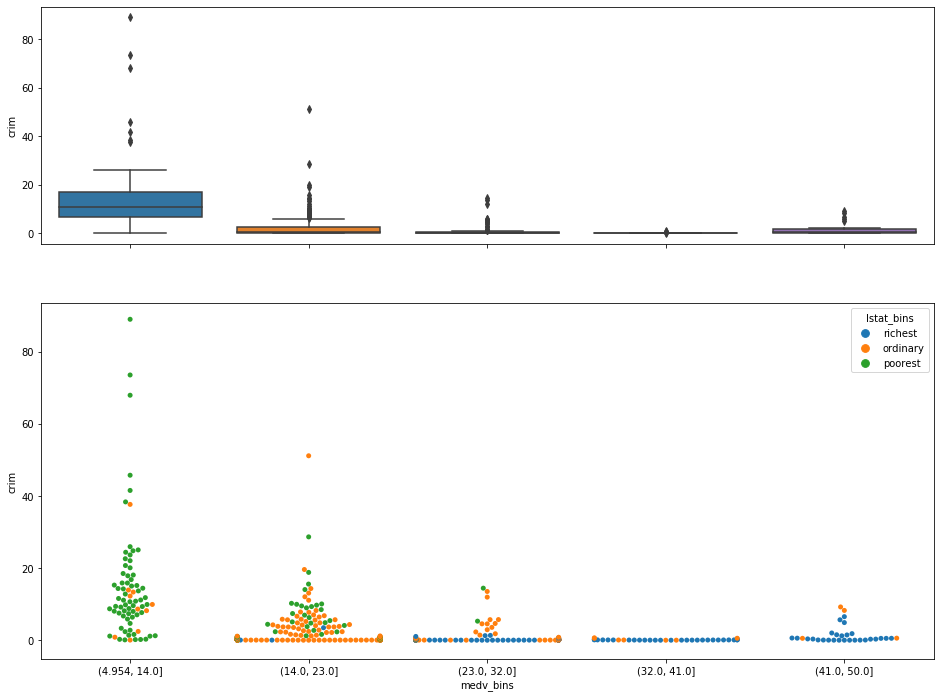

In [25]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df, ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df, ax=ax_box)

ax_viol.set(xlabel='')

[Text(0.5, 0, '')]

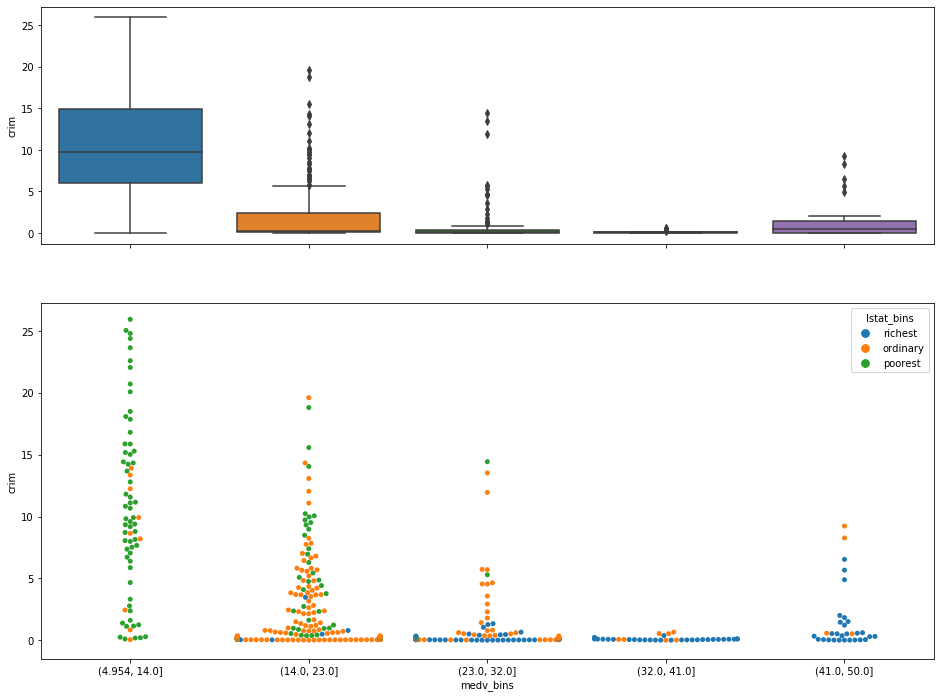

In [26]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df[df.crim < 27], ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df[df.crim < 27], ax=ax_box)

ax_viol.set(xlabel='')

### Find feature with strongest correlation to median house values

In [27]:
corr = df.corr()['medv'].abs().sort_values(ascending=False)
corr[1:6]

lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64

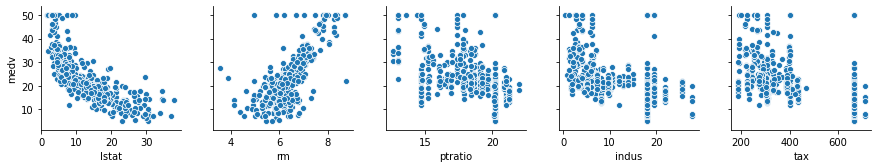

In [28]:
sns.pairplot(data=df, x_vars=corr.index[1:6], y_vars='medv')

LSTAT (% lower status of the population) has highest correlation with MEDV (Median value of owner-occupied homes in $1000's, our target), but as we can see relationship isn't linear. On the other hand RM (average number of rooms per dwelling) begs to fit a line to it!

# Data Cleaning

Big part of cleaning data is filling missing values. Here we don't have this problem. Refer to [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) for more.

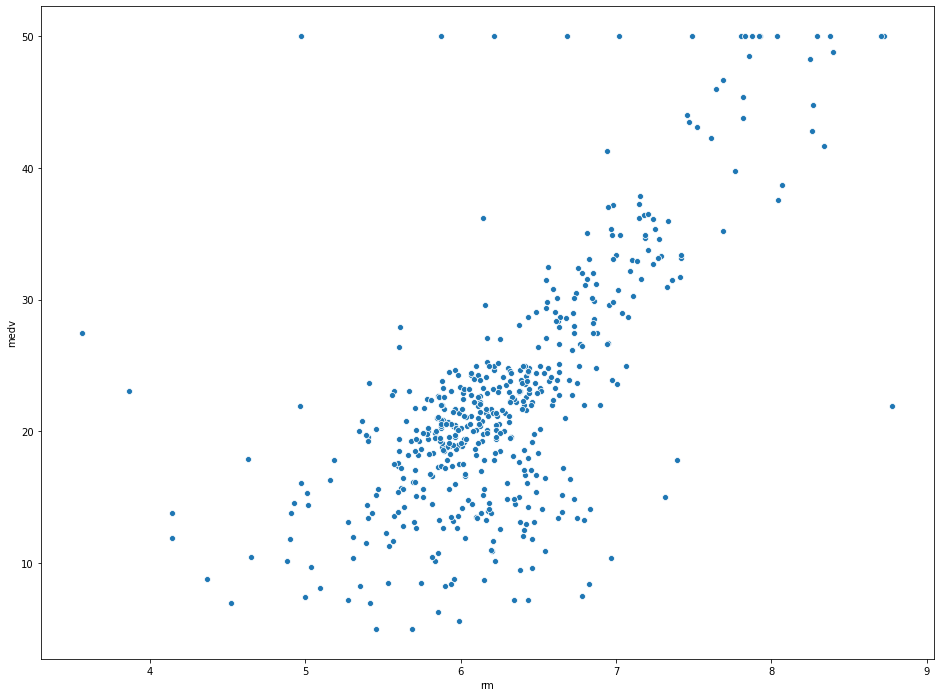

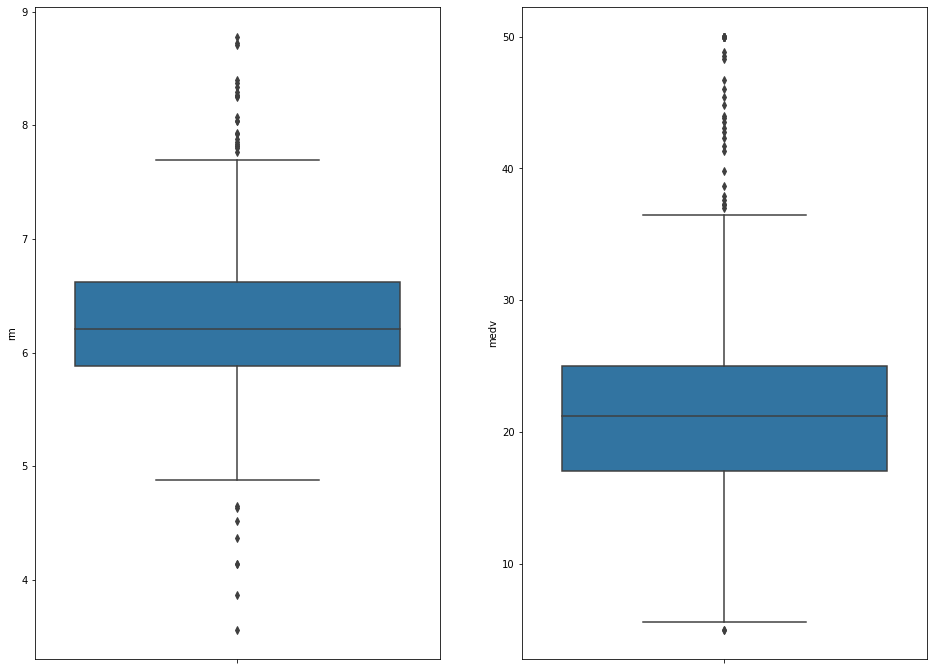

In [29]:
sns.scatterplot(x='rm', y='medv', data=df)
f, (ax_rm, ax_medv) = plt.subplots(ncols=2)
sns.boxplot(y='rm', data=df, ax=ax_rm)
sns.boxplot(y='medv', data=df, ax=ax_medv)

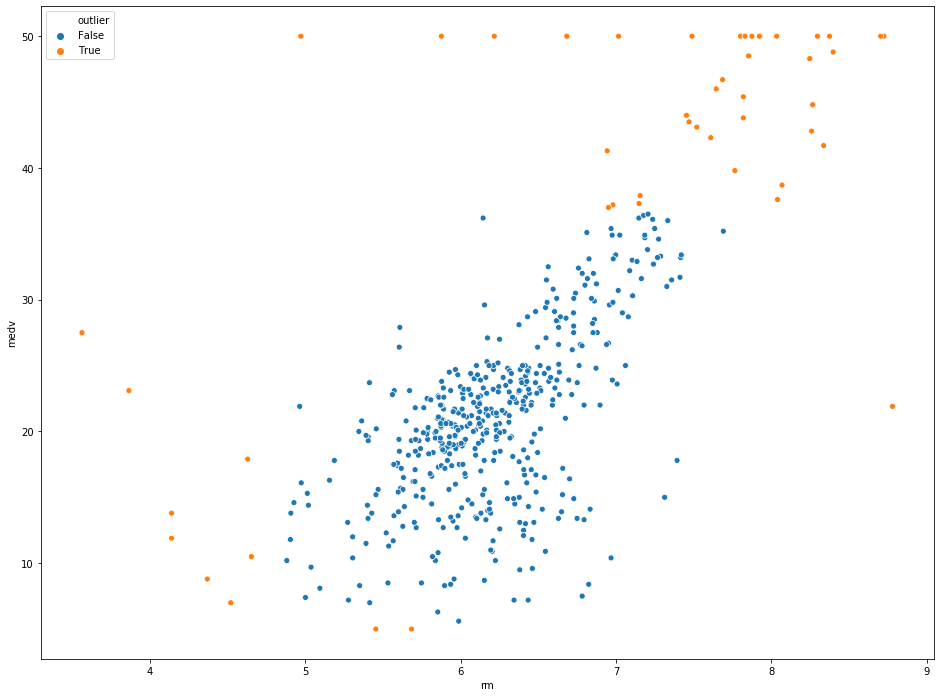

In [30]:
# Remove outliers...
# ...from medv
medv_Q1 = df.medv.quantile(0.25)
medv_Q3 = df.medv.quantile(0.75)
medv_IQR = medv_Q3 - medv_Q1
medv_outliers = (df.medv < (medv_Q1 - 1.5 * medv_IQR)) | (df.medv > (medv_Q3 + 1.5 * medv_IQR))

# ...from rm
rm_Q1 = df.rm.quantile(0.25)
rm_Q3 = df.rm.quantile(0.75)
rm_IQR = rm_Q3 - rm_Q1
rm_outliers = (df.rm < (rm_Q1 - 1.5 * rm_IQR)) | (df.rm > (rm_Q3 + 1.5 * rm_IQR))

df['outlier'] = medv_outliers | rm_outliers
sns.scatterplot(x='rm', y='medv', hue='outlier', data=df)

df_nooutliers = df[df.outlier == False]

In [31]:
# Two dims: number of rooms feature and bias
x = df_nooutliers.rm.values
y = df_nooutliers.medv.values

X = np.ones((df_nooutliers.shape[0], 2))
X[:, 0] = x # Merge biases with features

N = len(x)
print('Number of examples (N): ', N)

Number of examples (N):  457


# Simple Linear Regression

Model: $\hat y = x_i * \beta_1 + \beta_0$, our goal is to find parameters $\beta$ using e.g. least squares methods.

## Calculate coefficients

In [32]:
# Where it comes from?! See in ISL book, chapter 3!
B = linalg.inv(X.T @ X) @ X.T @ y
print("    Slope: ", B[0])
print("Intercept: ", B[1])

    Slope:  7.8127518074653555
Intercept:  -27.686129690134152


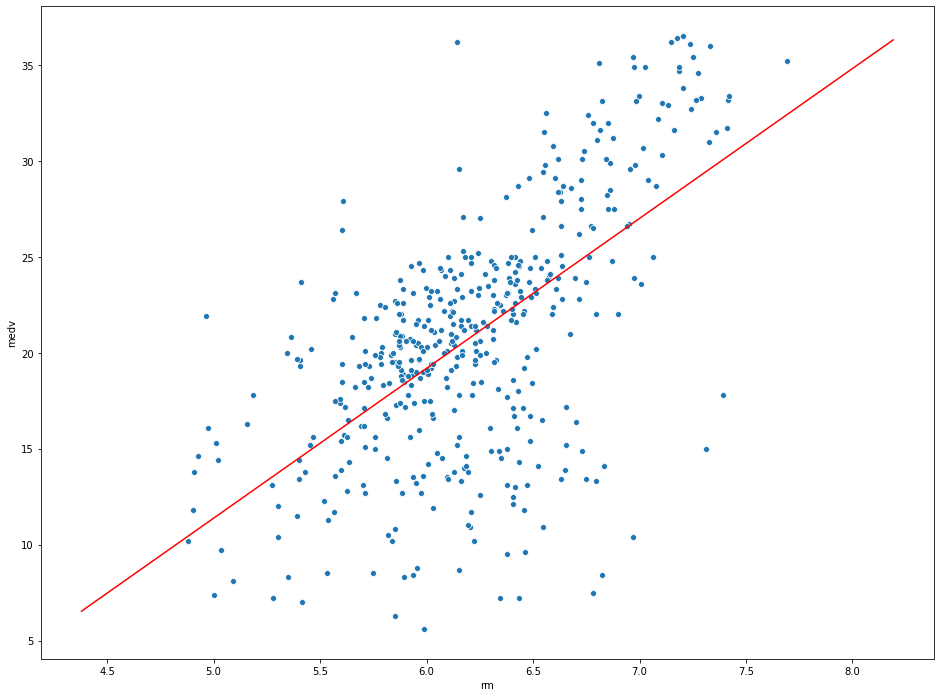

In [33]:
# Scatter data points
ax = sns.scatterplot(x='rm', y='medv', data=df_nooutliers)

# Plot regression line
X_ = np.array([
    [df_nooutliers.rm.min() - .5, 1],
    [df_nooutliers.rm.max() + .5, 1]
])
y_ = X_ @ B
ax.plot(X_[:, 0], y_, color='r')

## Calculate standard error

In [34]:
y_ = X @ B                          # Predictions
e = y - y_                          # Residuals
rss = e @ e.T                       # Residual sum of squares
rse = np.sqrt(rss/(N-2))            # Residual standard error
se = rse * np.sqrt(linalg.inv(X.T @ X))    # Standard error
se = np.array([se[0, 0], se[1, 1]])

print("    Slope std. error: ", se[0])
print("Intercept std. error: ", se[1])

    Slope std. error:  0.46983632706245276
Intercept std. error:  2.9263377415427336


/Users/piotr/anaconda3/envs/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


## Calculate confidence intervals of coefficients

In [35]:
# How to understand this? See: https://stattrek.com/estimation/confidence-interval.aspx#sixsteps
conf_level = 0.95
alpha = 1 - conf_level
prob = 1 - alpha/2
critical_value = stats.t.ppf(prob, N - 2) # N - 2 degrees of freedom
margin_of_error = critical_value * se
conf_interval = B - margin_of_error, B + margin_of_error

print("Confidence interval lower bound: ", conf_interval[0])
print("Confidence interval upper bound: ", conf_interval[1])

Confidence interval lower bound:  [  6.88943348 -33.43694354]
Confidence interval upper bound:  [  8.73607013 -21.93531584]


## Hypothesis testing
Null hypothesis: slope is equal zero, there is no relationship between number of rooms and house value.

In [36]:
t = np.abs(B[0] / se[0])
p = 2 * (1 - stats.t.cdf(t, N - 2))
print("p-value: ", p, " Statistical significance:", p < 0.05)

p-value:  0.0  Statistical significance: True


### In scipy...

In [37]:
print(stats.linregress(X[:, 0], y))
print("    Slope conf. interval", stats.t.interval(conf_level, N-2, loc=B[0], scale=se[0]))
print("Intercept conf. interval", stats.t.interval(conf_level, N-2, loc=B[1], scale=se[1]))

LinregressResult(slope=7.812751807465704, intercept=-27.686129690136244, rvalue=0.6148179523616245, pvalue=7.405164286938442e-49, stderr=0.4698363270624651)
    Slope conf. interval (6.889433484843394, 8.736070130087317)
Intercept conf. interval (-33.43694353596822, -21.935315844300085)


## Calculate confidence intervals of predictions

$S_{xx}$ - the sum of the squares of the difference between each x and the mean value of x.

In [38]:
x_mean = np.mean(x)

sxx = (x - x_mean) @ (x - x_mean).T
se_x = rse * np.sqrt(1/N + (x - x_mean)**2/sxx)

margin_of_error_x = critical_value * se_x
upper_confidence_band = y_ + margin_of_error_x
lower_confidence_band = y_ - margin_of_error_x

### Plot regression line with confidence bands

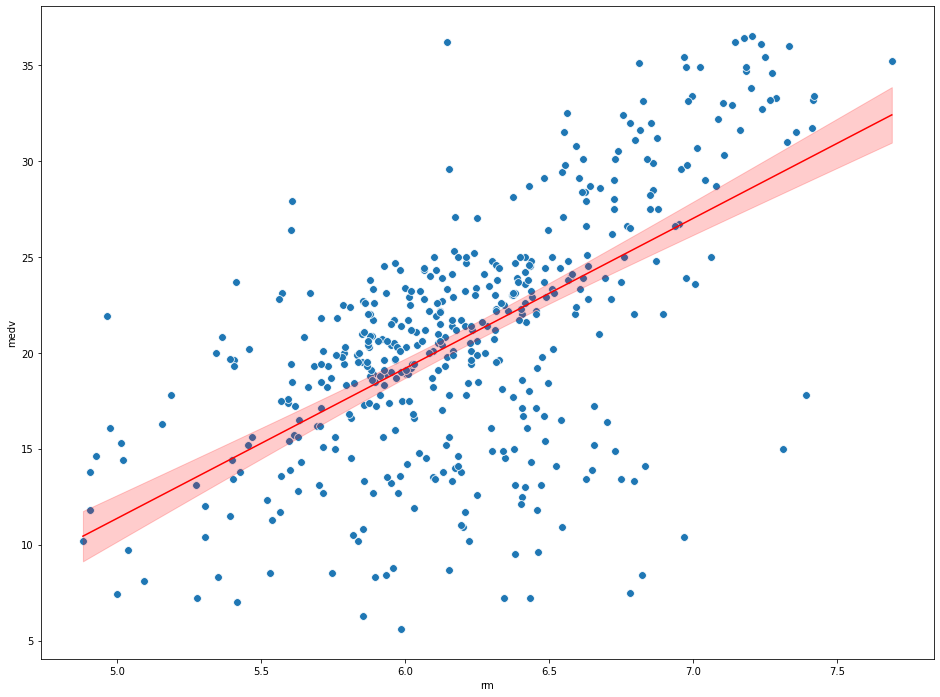

In [39]:
# Scatter data points
ax = sns.scatterplot(x='rm', y='medv', data=df_nooutliers, s=60)

# Plot regression line
ax.plot(np.sort(x), np.sort(y_), color='r')

# Draw confidence bands
ax.fill_between(np.sort(x), np.sort(upper_confidence_band), np.sort(lower_confidence_band), color='r', alpha=0.2)

### In seaborn...

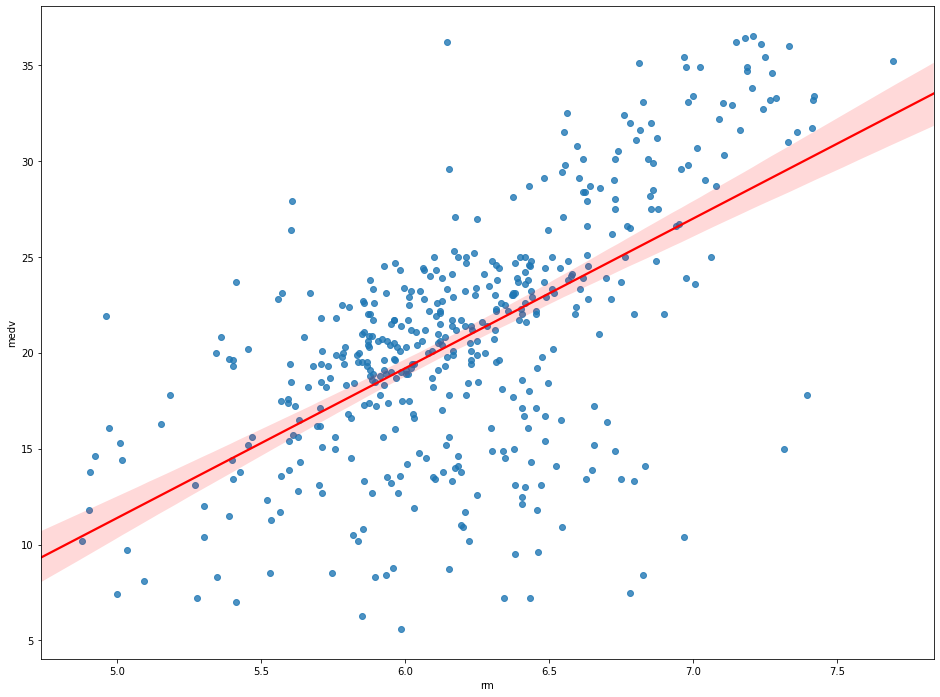

In [40]:
sns.regplot(x='rm', y='medv', data=df_nooutliers, line_kws={"color": 'r'})

Reference:
* [Pandas Tutorial](https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/) by Tomi Mester
* [Pandas website](https://pandas.pydata.org)